In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import pickle

In [4]:
with open('Pickled_df/train_df.pickle','rb') as f:
    train_df = pickle.load(f)

with open('Pickled_df/test_df.pickle','rb') as f:
    test_df = pickle.load(f)

In [5]:
train_df.head()

,Image,Id,Im_mat
0,0000e88ab.jpg,w_f48451c,"[[49, 65, 61, 80, 100, 105, 74, 44, 39, 29, 38..."
1,0001f9222.jpg,w_c3d896a,"[[180, 164, 115, 105, 149, 165, 129, 113, 122,..."
2,00029d126.jpg,w_20df2c5,"[[223, 221, 223, 221, 228, 235, 227, 218, 200,..."
3,00050a15a.jpg,new_whale,"[[178, 179, 179, 178, 178, 178, 177, 176, 177,..."
4,0005c1ef8.jpg,new_whale,"[[59, 54, 60, 53, 61, 58, 55, 65, 66, 69, 60, ..."


In [6]:
train_df['Im_mat'][0].shape

(128, 128)

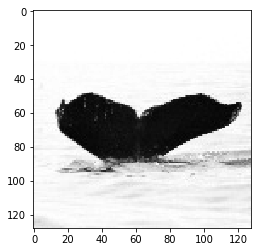

In [7]:
plt.imshow(train_df['Im_mat'][259],cmap='gist_gray')

In [8]:
train_df['Id'].nunique()

5005

In [9]:
# train_df['Id'].value_counts()

In [10]:
# from sklearn.feature_extraction.text import CountVectorizer

In [11]:
with open('Pickled_df/wid_spr_mat.pickle','rb') as f:
    wid_spr_mat = pickle.load(f)

In [12]:
# wid_spr_mat = CountVectorizer().fit(train_df['Id'])

In [13]:
len(wid_spr_mat.vocabulary_)

5005

In [14]:
train_df['Id'][63]

'w_2df85e7'

In [15]:
wid_spr_mat.vocabulary_['w_2df85e7']

904

In [16]:
wid_spr_mat.get_feature_names()[904]

'w_2df85e7'

In [17]:
# with open('Pickled_df/wid_spr_mat.pickle','wb') as f:
#     pickle.dump(wid_spr_mat,f)

In [18]:
train_df['cls'] = train_df['Id'].apply(lambda x : wid_spr_mat.vocabulary_[x])

In [19]:
train_df.head()

,Image,Id,Im_mat,cls
0,0000e88ab.jpg,w_f48451c,"[[49, 65, 61, 80, 100, 105, 74, 44, 39, 29, 38...",4786
1,0001f9222.jpg,w_c3d896a,"[[180, 164, 115, 105, 149, 165, 129, 113, 122,...",3808
2,00029d126.jpg,w_20df2c5,"[[223, 221, 223, 221, 228, 235, 227, 218, 200,...",662
3,00050a15a.jpg,new_whale,"[[178, 179, 179, 178, 178, 178, 177, 176, 177,...",0
4,0005c1ef8.jpg,new_whale,"[[59, 54, 60, 53, 61, 58, 55, 65, 66, 69, 60, ...",0


In [20]:
from sklearn.utils import shuffle

In [21]:
t_df = shuffle(train_df)
t_df.reset_index(drop=True,inplace=True)
t_df.head()

,Image,Id,Im_mat,cls
0,4275b9298.jpg,w_0bc078c,"[[108, 125, 128, 122, 120, 130, 128, 103, 129,...",234
1,b9e04f371.jpg,new_whale,"[[114, 126, 127, 123, 119, 126, 119, 120, 122,...",0
2,0a898c494.jpg,new_whale,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...",0
3,27e8a254e.jpg,w_c2a1bc4,"[[141, 140, 144, 139, 140, 144, 146, 141, 143,...",3796
4,f0992c72f.jpg,w_da04408,"[[171, 173, 157, 168, 168, 152, 174, 180, 167,...",4236


In [22]:
train_df.head()

,Image,Id,Im_mat,cls
0,0000e88ab.jpg,w_f48451c,"[[49, 65, 61, 80, 100, 105, 74, 44, 39, 29, 38...",4786
1,0001f9222.jpg,w_c3d896a,"[[180, 164, 115, 105, 149, 165, 129, 113, 122,...",3808
2,00029d126.jpg,w_20df2c5,"[[223, 221, 223, 221, 228, 235, 227, 218, 200,...",662
3,00050a15a.jpg,new_whale,"[[178, 179, 179, 178, 178, 178, 177, 176, 177,...",0
4,0005c1ef8.jpg,new_whale,"[[59, 54, 60, 53, 61, 58, 55, 65, 66, 69, 60, ...",0


In [23]:
test_df.head()

,Image,Im_mat
0,00028a005.jpg,"[[184, 183, 189, 192, 191, 193, 194, 188, 190,..."
1,000dcf7d8.jpg,"[[175, 163, 171, 177, 170, 161, 150, 161, 157,..."
2,000e7c7df.jpg,"[[188, 187, 192, 206, 217, 203, 188, 173, 166,..."
3,0019c34f4.jpg,"[[137, 132, 148, 134, 125, 136, 144, 122, 104,..."
4,001a4d292.jpg,"[[63, 68, 62, 70, 81, 77, 62, 56, 60, 71, 78, ..."


In [24]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])
u = np.array([[9,10],[11,12]])
z = np.array([x,y,u])
z = z.reshape(3,2,2,1)
z[2,:,:,:]
# len(z)
# z

array([[[ 9],
        [10]],

       [[11],
        [12]]])

In [25]:
for x in train_df['Im_mat']:
    print(x)
    break

[[ 49  65  61 ...  41  64 109]
 [123 134 128 ...  64  81  77]
 [ 34  36  42 ...  68  56  69]
 ...
 [ 60  63  69 ...  38  33  39]
 [ 70  91  96 ...  36 145 131]
 [ 54  38  25 ... 131  36  36]]


In [26]:
class train_help():
    def __init__(self):
        self.i = 0
        self.all_train_batches = train_df
        self.test_batches = test_df

        self.training_images = None
        self.training_labels = None
        
        self.test_images = None
    
    def set_up_images(self):
        
        print("Setting Up Training Images and Labels")
        
        self.all_train_batches = shuffle(train_df)
        self.all_train_batches.reset_index(drop=True,inplace=True)
        
        self.training_images = np.array([img for img in self.all_train_batches['Im_mat']])
        train_len = len(self.training_images)

        self.training_images = self.training_images.reshape(train_len,128,128,1)/255
        
        temp_vals = np.array([cls for cls in self.all_train_batches['cls']])
        self.training_labels = np.zeros((train_len,5005))
        self.training_labels[range(train_len),temp_vals] = 1
        
        print("Setting Up Test Images and Labels")
        
        
        self.test_images = np.array([img for img in self.test_batches['Im_mat']])
        test_len = len(self.test_images)
        self.test_images = self.test_images.reshape(test_len,128,128,1)/255


        
    def next_batch(self, batch_size):
        if self.i == 25300:
            self.i == 25360 - 100

        x = self.training_images[self.i:self.i+batch_size]
        y = self.training_labels[self.i:self.i+batch_size]
        self.i = (self.i + batch_size) % len(self.training_images)
        return x, y

Rough work

In [27]:
# t = tf.Variable(np.array([[5.69,2.35,6.66,6.69,4.56],[5.69,7.35,6.66,6.69,8.56]]))

# t_m3 = tf.nn.top_k(t,k=3)

# t_i3 = tf.reshape(t_m3.indices[:,0],shape=[-1,1])

# init = tf.global_variables_initializer()

# sess = tf.InteractiveSession()

# sess.run(init)

# sess.run(t_m3)

# _,t_y =sess.run(t_m3)

# t_y

# sess.run(t_i3)

# sess.close()

Rough _END

In [28]:
def init_wgts(shape):
    shape = np.array(shape)
    w_vals = tf.truncated_normal(shape=shape.flatten(),stddev=0.1)
    return tf.Variable(w_vals)

In [29]:
def init_bias(shape):
    shape = np.array(shape)
    b_vals = tf.truncated_normal(shape=shape,stddev=0.1)
    return tf.Variable(b_vals)

In [30]:
def cov2d(x,w):
    return tf.nn.conv2d(x,w,strides=[1,1,1,1],padding="SAME")

In [31]:
def maxpool2by2(x):
    return tf.nn.max_pool(x,ksize=[1,4,4,1],strides=[1,4,4,1],padding="SAME")

In [32]:
def covlyr(x,shape):
    w = init_wgts([shape])
    b = init_bias([shape[-1]])
    return tf.nn.relu(cov2d(x,w)+b)

In [33]:
def full_clsfr(con_to_full,out_size):
    in_size = int(con_to_full.get_shape()[1])
    w = init_wgts([in_size,out_size])
    b = init_bias([out_size])
    return (tf.matmul(con_to_full,w)+b)

In [34]:
x = tf.placeholder(tf.float32,shape=[None,128,128,1])
y = tf.placeholder(tf.float32,shape=[None,5005])

In [35]:
covlyr_1 = covlyr(x,shape=[4,4,1,32])

Instructions for updating:
Colocations handled automatically by placer.


In [36]:
maxpool2by2_1 = maxpool2by2(covlyr_1)

In [37]:
covlyr_2 = covlyr(maxpool2by2_1,shape=[4,4,32,64])

In [38]:
maxpool2by2_2 = maxpool2by2(covlyr_2)

In [39]:
con_to_full = tf.reshape(maxpool2by2_2,shape=[-1,8*8*64])

In [40]:
full_clsfr_1 = full_clsfr(con_to_full,10010)

In [41]:
full_clsfr_1 = tf.nn.relu(full_clsfr_1)

In [42]:
hold_prob = tf.placeholder(tf.float32)
full_out_dropout = tf.nn.dropout(full_clsfr_1,keep_prob=hold_prob)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [43]:
y_pred = full_clsfr(full_out_dropout,5005)

In [44]:
first_5 = tf.nn.top_k(y_pred,k=5)

In [45]:
# we need while creating submission file
p_val = first_5.values
p_ind = first_5.indices

In [46]:
loss_fn = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=y_pred))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [47]:
optimizer = tf.train.AdamOptimizer(learning_rate= 0.0001)

In [48]:
train = optimizer.minimize(loss_fn)

In [49]:
init = tf.global_variables_initializer()

In [50]:
help_obj = train_help()

In [51]:
help_obj.set_up_images()

Setting Up Training Images and Labels
Setting Up Test Images and Labels


In [52]:
# v = np.random.randint(0,25361,size=(100))
# # len(help_obj.training_images[[1,1]])
# len(np.unique(v))

In [53]:
saver = tf.train.Saver()

In [54]:
# len(train_df)

In [55]:
# for i in range(1,25361):
#     if 25361%i == 0:
#         print(i)

In [56]:
from IPython.display import clear_output

In [57]:
steps = 10000
batch_size = 100
accr = 0
with tf.Session() as sess:
    sess.run(init)
    for i in range(steps):
        batch_x,batch_y = help_obj.next_batch(batch_size)
        sess.run(train,feed_dict={x:batch_x,y:batch_y,hold_prob:0.7})
#         clear_output()
        print('Currently on step {}'.format(i))
        print('Accuracy is:')
        print(accr)
        print('\n')
        if i%50 == 0:
            clear_output()
#             print('Currently on step {}'.format(i))
#             print('Accuracy is:')
#             # Test the Train Model
            matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y,1))

            acc = tf.reduce_mean(tf.cast(matches,tf.float32))
            
            v= np.random.randint(0,25361,size=(100))
            accr = sess.run(acc,feed_dict={x:help_obj.training_images[v],y:help_obj.training_labels[v],hold_prob:1})
#             print(accr)
#             print('\n')
    path = saver.save(sess,'CNN_mdl/CNN_prj_wid.ckpt')
    print(path)

Currently on step 9951
Accuracy is:
0.98


Currently on step 9952
Accuracy is:
0.98


Currently on step 9953
Accuracy is:
0.98


Currently on step 9954
Accuracy is:
0.98


Currently on step 9955
Accuracy is:
0.98


Currently on step 9956
Accuracy is:
0.98


Currently on step 9957
Accuracy is:
0.98


Currently on step 9958
Accuracy is:
0.98


Currently on step 9959
Accuracy is:
0.98


Currently on step 9960
Accuracy is:
0.98


Currently on step 9961
Accuracy is:
0.98


Currently on step 9962
Accuracy is:
0.98


Currently on step 9963
Accuracy is:
0.98


Currently on step 9964
Accuracy is:
0.98


Currently on step 9965
Accuracy is:
0.98


Currently on step 9966
Accuracy is:
0.98


Currently on step 9967
Accuracy is:
0.98


Currently on step 9968
Accuracy is:
0.98


Currently on step 9969
Accuracy is:
0.98


Currently on step 9970
Accuracy is:
0.98


Currently on step 9971
Accuracy is:
0.98


Currently on step 9972
Accuracy is:
0.98


Currently on step 9973
Accuracy is:
0.98


Currently o